Importing All The Libraries Required

In [1]:
import numpy as np
import os
import pandas as pd
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Dell\AppData\Local\Temp\ipykernel_5232\3040863414.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Clearing all the warnings

In [2]:
warnings.filterwarnings('ignore')

Import Stock Data

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\RELIANCE.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,06-01-2006,142.611084,144.119675,141.280441,142.456360,125.332260,41098419.0
1,09-01-2006,142.812225,143.199051,140.212830,140.824005,123.896133,40327444.0
2,10-01-2006,140.646072,140.800797,137.435501,138.340652,121.711319,62046055.0
3,12-01-2006,133.544128,138.789352,133.544128,137.218887,120.724396,127177465.0
4,13-01-2006,137.698532,138.789352,136.630920,136.955841,120.492958,65481486.0


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date        Open        High         Low       Close   Adj Close  \
0  06-01-2006  142.611084  144.119675  141.280441  142.456360  125.332260   
1  09-01-2006  142.812225  143.199051  140.212830  140.824005  123.896133   
2  10-01-2006  140.646072  140.800797  137.435501  138.340652  121.711319   
3  12-01-2006  133.544128  138.789352  133.544128  137.218887  120.724396   
4  13-01-2006  137.698532  138.789352  136.630920  136.955841  120.492958   

        Volume  
0   41098419.0  
1   40327444.0  
2   62046055.0  
3  127177465.0  
4   65481486.0  
(4200, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


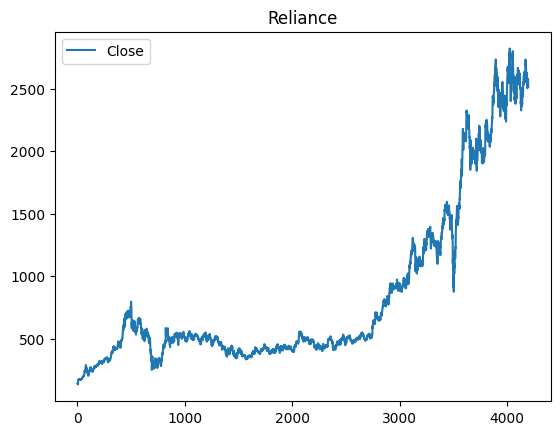

In [5]:
df[['Close']].plot()
plt.title("Reliance")
plt.show()

Text(0.5, 1.0, 'Reliance Cumulative Returns')

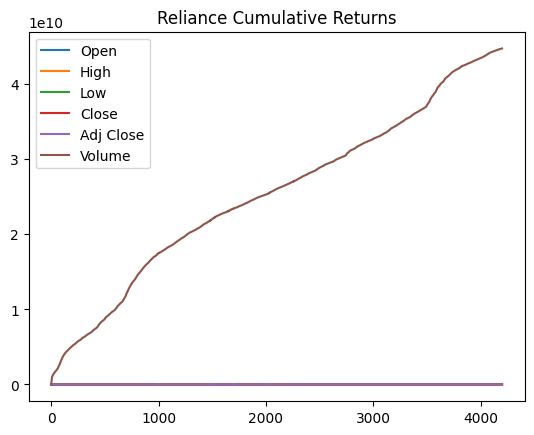

In [6]:
dr = df.cumsum()
dr.plot()
plt.title("Reliance Cumulative Returns")

Text(0.5, 1.0, 'Reliance Autocorrection Plot')

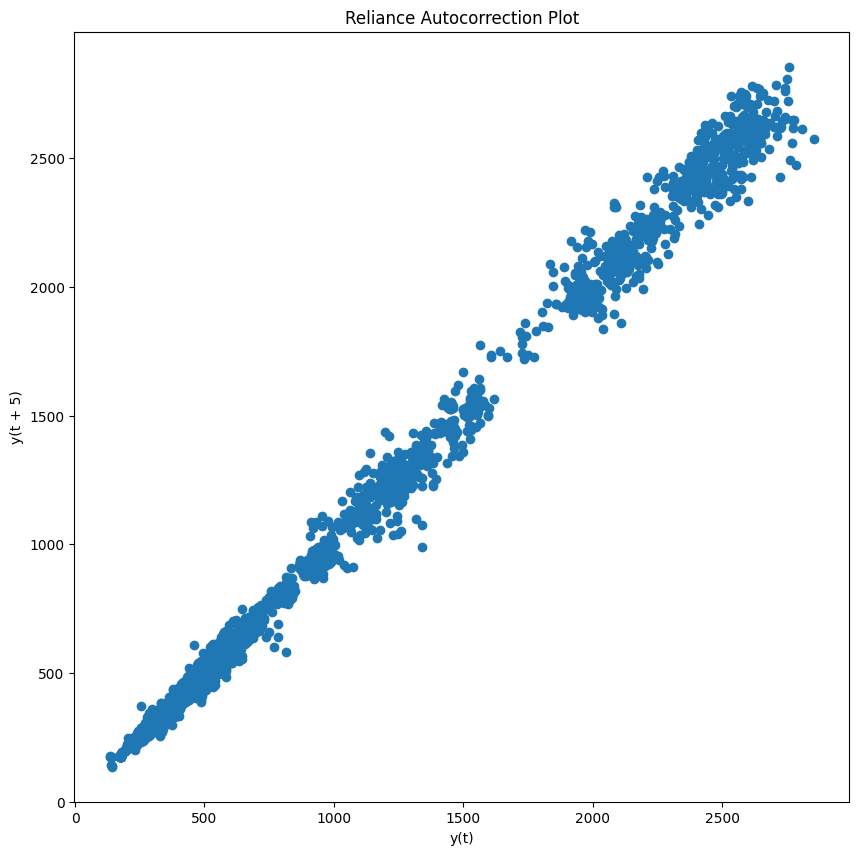

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag =5)
plt.title('Reliance Autocorrection Plot')

In [8]:
df['Date'][4199]

'05-01-2023'

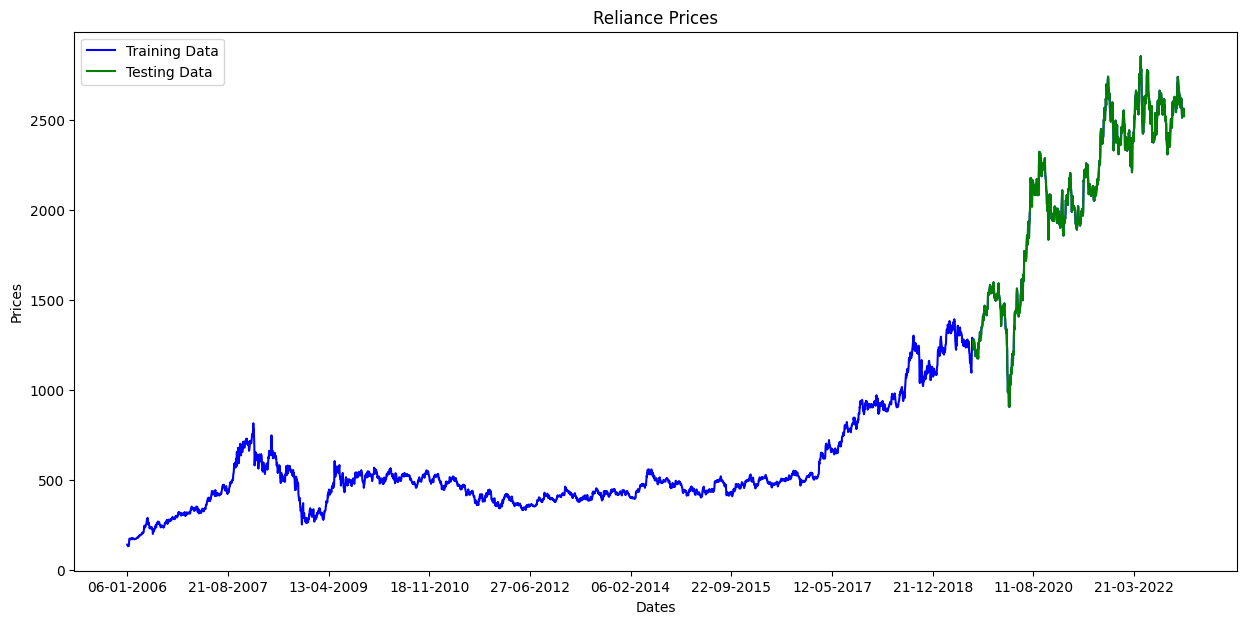

In [9]:
train_data, test_data = df[0:int(len(df)* 0.8)], df[int(len(df)*0.8):]
plt.figure(figsize = (15,7))
plt.title('Reliance Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label = 'Training Data')
plt.plot(test_data['Open'], 'green', label = 'Testing Data')
plt.xticks(np.arange(0,4199,400), df['Date'][0:4199:400])
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true)*200/(np.abs(y_pred) + np.abs(y_true))))

In [11]:
import statsmodels.api as smapi

In [13]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = smapi.tsa.arima.ARIMA(history, order = (1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
errorms = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' %errorms)
errorsymm = smape_kun(test_ar, predictions)
print('Symmentric Mean Absolute Percentage Error: %3f' %errorsymm)

<class 'list'>
Testing Mean Squared Error: 1594.142
Symmentric Mean Absolute Percentage Error: 1.468668


Plotting The Final Data

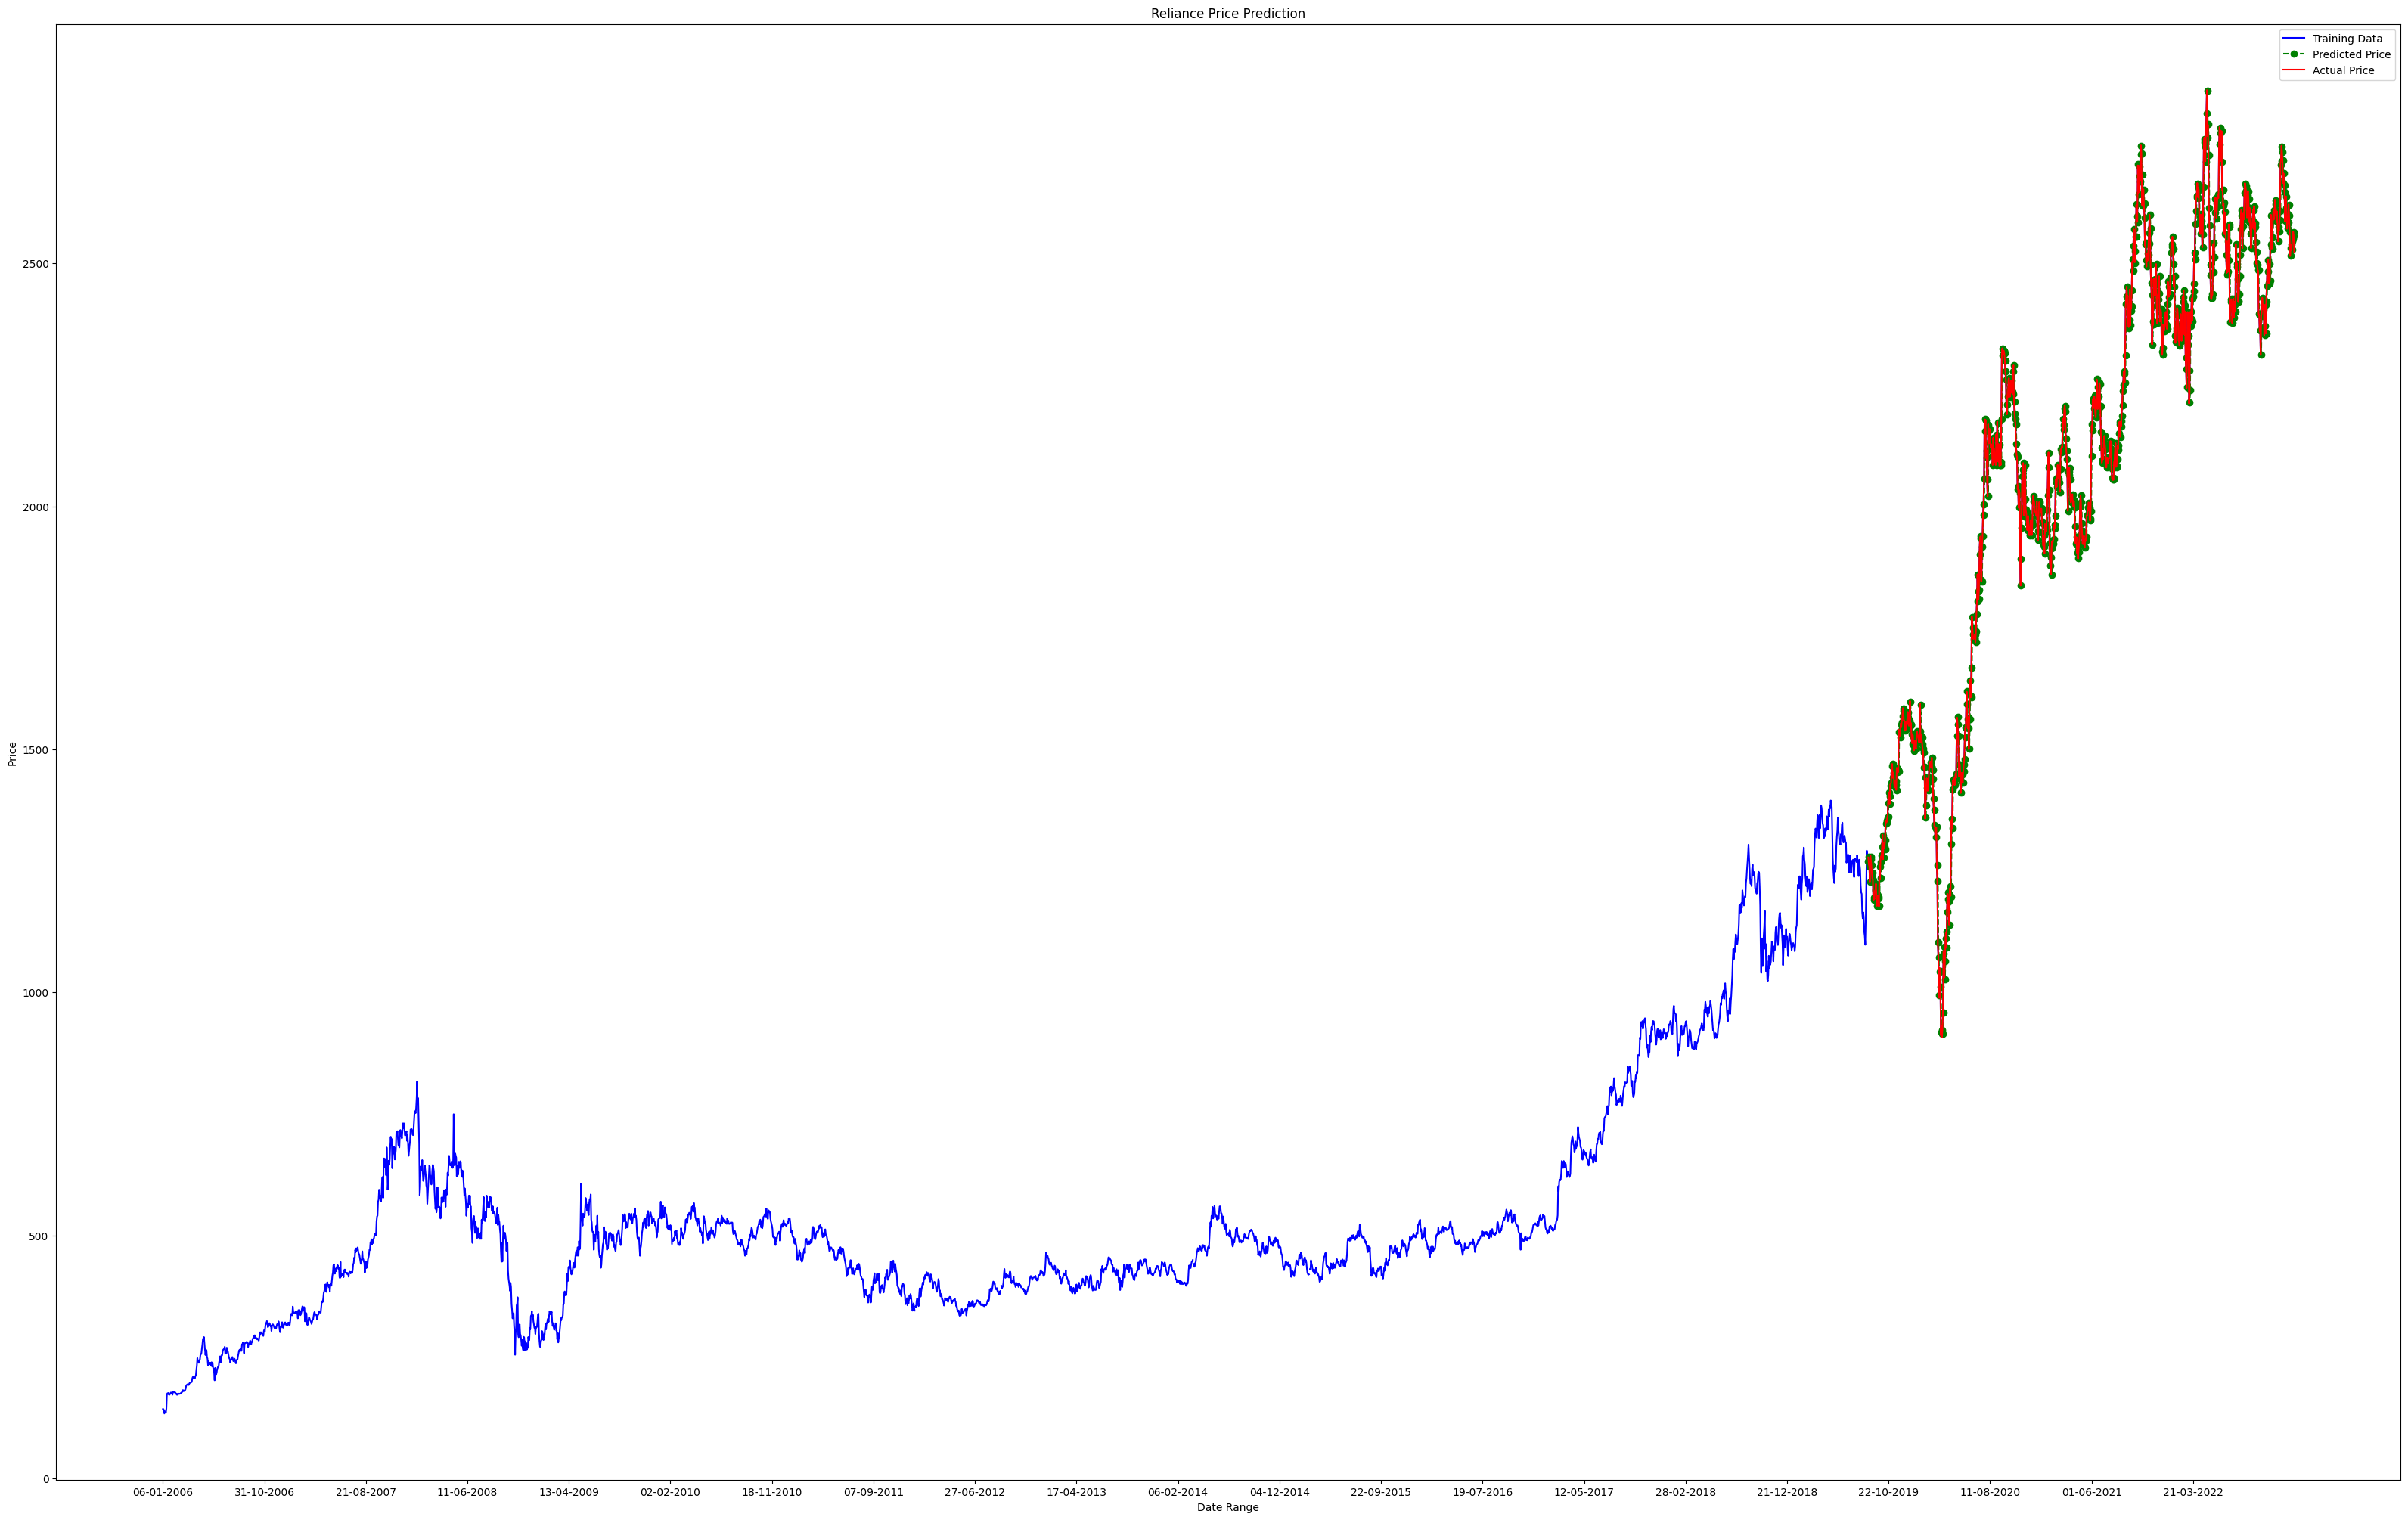

In [17]:
plt.figure(figsize = (40,25))
plt.plot(df['Open'], 'green', color = 'blue', label = 'Training Data')
plt.plot(test_data.index,predictions, color = 'green', marker = 'o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Actual Price')
plt.title('Reliance Price Prediction')
plt.xlabel('Date Range')
plt.ylabel('Price')
plt.xticks(np.arange(0,4199,200), df['Date'][0:4199:200])
plt.legend()